Part 1: NLP Assignment
As part of this mandatory exercise, you are going to do text classification using probabilistic classifiers,
mainly using Multinomial Naïve Bayes classifier and 2) Logistic Regression classifier

The labelled dataset consists of texts collected from 42 online forums, including Reddit and other discussion forums about type II diabetes. The data consists of peer-to-peer conversations about type 2 diabetes, originating from domains that are either dedicated to diabetes or which have a health related focus. All the texts are in English, and most of them originate from the US or UK and include texts from India, Australia, and other countries. From a total dataset of around 33 000 discussion texts, a total of 2000-3000 randomly chosen texts were manually coded for the domain-specific models (shown in table 1) to generate the labelled dataset which you will use as a training dataset for building the classifiers. For more information on the domain specific models or the dataset.

The labelled dataset is provided in an Excel file (Diabetes-classification.xlsx) and this assignment. The Excel file contains two sheets: 1) Patient-journey and 2) Emotions, which contains the labelled data for those models. The columns discussion_text contains the text for classification and the Label column contains the domain-specific label. You can use pandas python library to load the given data from excel as shown in the sample coding in listing 1. The following are the domain-specific models for which you have to build classifiers.


2. Patient Journey Model: A patient journey model follows the patient from the pre-diagnosis stage over the treatment through to a viable cure. A detailed description of labels for the patient journey model is provided in table 1. Your task to build domain-specific text classifiers for the above models (individually) using both
Multinomial NB and Logistic Regression algorithms. You can use either use scikit-learn [6] or NLTK [7]
for building the classifiers.
Therefore for each domain-specific models, build both Multinomial NB and Logistic Regression
classifiers and test them using part of the labelled dataset as the test set.
1. Compare the performance of the Multinomial NB and Logistic Regression classifiers using performance measures/classification report and comment on which classifier performs better on the given dataset? Are there any differences in the comparison of classifiers between different domain-specific models, i.e. Emotions versus Patient Journey?
2. Extract most informative features used by the classifiers for the classification of labels in the case of both models. Do you see any difference or pattern in the features used by the generative classifiers (Multinomial NB) versus discriminative (Logistic Regression) classifiers? Also, comment on which classifier performs better in terms of qualitative validation, i.e. for which classifier, the most informative features seems to be reasonable and makes sense for a given label of the model.

# Emotions 

1. Emotions: The chosen eight primary emotion labels are primarily consisting of two main characteristics: they had to be identifiable at all phylogenetic levels and have adaptive significance in the individual’s struggle for survival.

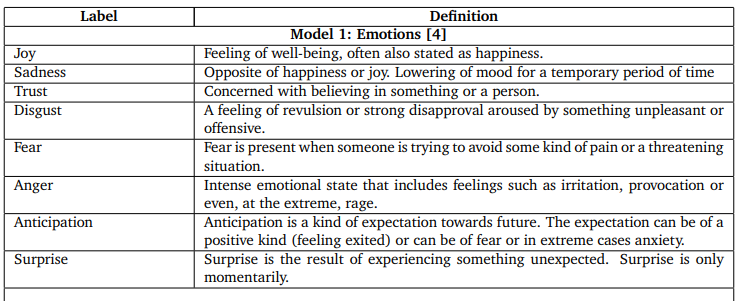

In [9]:
import pandas as pd
df_e = pd. read_excel ("Diabetes-classification.xlsx", \
sheet_name ="Emotions")
print (df_e. head () , df_e. tail ())

   No                                    discussion_text    Label ModelName  \
0   1   ...been on a low-carb diet my blood glucose h...    Trust  Emotions   
1   2  A major problem with the American diet is too ...  Disgust  Emotions   
2   3  Everybody knows that being fat leads to Type 2...    Trust  Emotions   
3   4  For example  this diet could help reduce prost...  Disgust  Emotions   
4   5  Hi everyone I have T2 diabetes and was diagnos...  Disgust  Emotions   

                                 TextId  
0  508e98fc-8db4-4283-a2a4-63c3b70acf86  
1  1349404b-4192-4da2-89ed-346d17351c6b  
2  a8961bab-8d57-492e-89b1-07b616a605f1  
3  10628e32-8c12-4c09-b9e0-f98885519c94  
4  470c5855-24b9-44b3-aedc-c5cf2ed5ed6d           No                                    discussion_text    Label  \
3381  3382  It does have a black box warning.. Victoza Vic...    Trust   
3382  3383  It does not answer the fact that my internal g...    Trust   
3383  3384  It does not matter how much or what tim

In [10]:
df_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3386 entries, 0 to 3385
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   No               3386 non-null   int64 
 1   discussion_text  3386 non-null   object
 2   Label            3386 non-null   object
 3   ModelName        3386 non-null   object
 4   TextId           3386 non-null   object
dtypes: int64(1), object(4)
memory usage: 132.4+ KB


## Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer 

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_e.discussion_text, df_e.Label, test_size=0.25, random_state=0)

In [69]:
tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95)
tfidf_vectorizer.fit_transform(x_train.values)
        
#this might be wrong. I'm confused why I'm transforming on x_train values. If this not intorducing train-test leakage?
    
X_train=tfidf_vectorizer.transform(X_train.values)
X_test=tfidf_vectorizer.transform(X_test.values)

<2539x9278 sparse matrix of type '<class 'numpy.float64'>'
	with 135344 stored elements in Compressed Sparse Row format>

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer 
 
scikit_log_reg = LogisticRegression(penalty='l2', solver='lbfgs', dual=False, multi_class='multinomial', tol=1e-3)
model=scikit_log_reg.fit(X_train, y_train)

In [78]:
probs = model.predict(X_test)
probs

array(['Trust', 'Trust', 'Anticipation', 'Trust', 'Anticipation',
       'Anticipation', 'Anticipation', 'Trust', 'Anticipation', 'Trust',
       'Trust', 'Anticipation', 'Anticipation', 'Trust', 'Trust', 'Trust',
       'Anticipation', 'Trust', 'Trust', 'Trust', 'Anticipation',
       'Anticipation', 'Trust', 'Trust', 'Anticipation', 'Anticipation',
       'Anticipation', 'Trust', 'Trust', 'Anticipation', 'Trust', 'Trust',
       'Anticipation', 'Trust', 'Trust', 'Anticipation', 'Trust',
       'Anticipation', 'Trust', 'Trust', 'Anticipation', 'Anticipation',
       'Trust', 'Trust', 'Anticipation', 'Anticipation', 'Trust', 'Trust',
       'Anticipation', 'Trust', 'Trust', 'Anticipation', 'Anticipation',
       'Trust', 'Trust', 'Anticipation', 'Anticipation', 'Anticipation',
       'Trust', 'Trust', 'Trust', 'Trust', 'Anticipation', 'Trust',
       'Trust', 'Trust', 'Anticipation', 'Trust', 'Trust', 'Trust',
       'Trust', 'Trust', 'Trust', 'Trust', 'Trust', 'Trust', 'Trust',
      

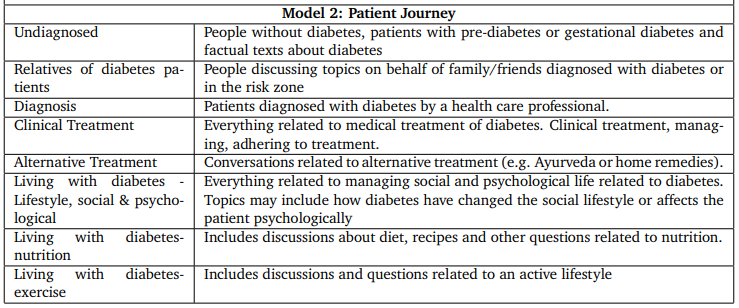

In [7]:
import pandas as pd
df_pj = pd. read_excel ("Diabetes-classification.xlsx", \
sheet_name ="Patient-journey")
print (df_pj. head () , df_pj. tail ())

   No                                    discussion_text  \
0   1   ...been on a low-carb diet my blood glucose h...   
1   2  A major problem with the American diet is too ...   
2   3  Everybody knows that being fat leads to Type 2...   
3   4  For example  this diet could help reduce prost...   
4   5  Hi everyone I have T2 diabetes and was diagnos...   

                              Label        ModelName  \
0  Living with diabetes - Nutrition  Patient Journey   
1  Living with diabetes - Nutrition  Patient Journey   
2                       Undiagnosed  Patient Journey   
3  Living with diabetes - Nutrition  Patient Journey   
4                Clinical Treatment  Patient Journey   

                                 TextId  
0  508e98fc-8db4-4283-a2a4-63c3b70acf86  
1  1349404b-4192-4da2-89ed-346d17351c6b  
2  a8961bab-8d57-492e-89b1-07b616a605f1  
3  10628e32-8c12-4c09-b9e0-f98885519c94  
4  470c5855-24b9-44b3-aedc-c5cf2ed5ed6d           No                                    disc

In [8]:
df_pj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   No               1426 non-null   int64 
 1   discussion_text  1426 non-null   object
 2   Label            1426 non-null   object
 3   ModelName        1426 non-null   object
 4   TextId           1426 non-null   object
dtypes: int64(1), object(4)
memory usage: 55.8+ KB
